# SRN: PES1UG20CS621
# Assignment ID: Student_44

In [78]:
#For dataframe operations
import numpy as np
import pandas as pd

#For visualisation of data
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
#Reading and displaying the .csv
data=pd.read_csv("44.csv")
data

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,87.0,99.0,88.0
1,female,group A,some high school,standard,completed,21.0,117.0,102.0
2,male,group C,some high school,standard,none,105.0,115.0,107.0
3,male,group A,some college,standard,none,62.0,84.0,58.0
4,female,group D,some college,standard,none,91.0,105.0,89.0
...,...,...,...,...,...,...,...,...
995,male,group A,master's degree,standard,none,103.0,119.0,109.0
996,female,group A,some high school,free/reduced,none,77.0,82.0,69.0
997,female,group D,associate's degree,free/reduced,none,74.0,98.0,79.0
998,male,group D,master's degree,standard,none,83.0,105.0,91.0


In [80]:
#To find range of scores
data.describe()

,math score,reading score,writing score
count,997.000000,997.000000,996.000000
mean,80.225677,94.132397,80.983936
std,16.967670,17.083557,16.762237
min,20.000000,20.000000,24.000000
25%,70.000000,85.000000,71.000000
50%,81.000000,97.000000,82.000000
75%,92.000000,106.000000,92.250000
max,116.000000,120.000000,119.000000


In [81]:
#Finding null/empty values
data.isnull().sum()

gender                         0
race                           0
parental level of education    4
lunch                          0
test preparation course        0
math score                     3
reading score                  3
writing score                  4
dtype: int64

## Columns with null values:  'parental level of education' , 'math score', 'reading score', 'writing score'

In [82]:
#Removing rows with null/empty value in 'parental level of education' column
data.dropna(subset=['parental level of education'],inplace=True)

data.isnull().sum()

gender                         0
race                           0
parental level of education    0
lunch                          0
test preparation course        0
math score                     2
reading score                  2
writing score                  3
dtype: int64

## Removed rows with null in 'parental level of education' column

In [83]:
#Filling mean values of marks in null/empty cells of scores
data['math score'].fillna(value=data['math score'].mean(),inplace=True)
data['reading score'].fillna(value=data['writing score'].mean(),inplace=True)
data['writing score'].fillna(value=data['writing score'].mean(),inplace=True)
data.isnull().sum()

gender                         0
race                           0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Filled in average values of scores in null/empty cells

In [84]:
#Normalising scores to fit in the range of 1-100 by subtracting minimum values
math_min=data['math score'].min()
reading_min=data['reading score'].min()
writing_min=data['writing score'].min()

min_sum=math_min+reading_min+writing_min

data['percentage']=(data['math score']+data['reading score']+data['writing score']-min_sum)/300*100

In [85]:
data

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage
0,female,group B,bachelor's degree,standard,none,87.0,99.0,88.0,70.000000
1,female,group A,some high school,standard,completed,21.0,117.0,102.0,58.666667
2,male,group C,some high school,standard,none,105.0,115.0,107.0,87.666667
3,male,group A,some college,standard,none,62.0,84.0,58.0,46.666667
4,female,group D,some college,standard,none,91.0,105.0,89.0,73.666667
...,...,...,...,...,...,...,...,...,...
995,male,group A,master's degree,standard,none,103.0,119.0,109.0,89.000000
996,female,group A,some high school,free/reduced,none,77.0,82.0,69.0,54.666667
997,female,group D,associate's degree,free/reduced,none,74.0,98.0,79.0,62.333333
998,male,group D,master's degree,standard,none,83.0,105.0,91.0,71.666667


## Percentage column added

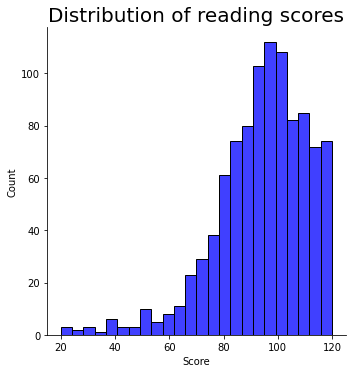

0    99.0
dtype: float64


In [86]:
#Plotting distribution of Reading score
sns.displot(data['reading score'], color = 'blue')
plt.title('Distribution of reading scores', fontsize = 20)
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()
print(data['reading score'].mode())

# Left Skewed/Negatively Skewed <br>
# Skewness formula =  3 * (Mean – Median) / Standard Deviation <br>
# Most of the students have scores between 80-120

In [87]:
#Generating grades acc to percentages
def grader(percentage):
    if(percentage >= 90):
        return 'S'
    if(percentage >= 80):
        return 'A'
    if(percentage >= 70):
        return 'B'
    if(percentage >= 60):
        return 'C'
    if(percentage >= 40):
        return 'D'
    else :
        return 'F'

data['grades'] = data.apply(lambda x: grader(x['percentage']), axis = 1 )

In [88]:
data

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grades
0,female,group B,bachelor's degree,standard,none,87.0,99.0,88.0,70.000000,B
1,female,group A,some high school,standard,completed,21.0,117.0,102.0,58.666667,D
2,male,group C,some high school,standard,none,105.0,115.0,107.0,87.666667,A
3,male,group A,some college,standard,none,62.0,84.0,58.0,46.666667,D
4,female,group D,some college,standard,none,91.0,105.0,89.0,73.666667,B
...,...,...,...,...,...,...,...,...,...,...
995,male,group A,master's degree,standard,none,103.0,119.0,109.0,89.000000,A
996,female,group A,some high school,free/reduced,none,77.0,82.0,69.0,54.666667,D
997,female,group D,associate's degree,free/reduced,none,74.0,98.0,79.0,62.333333,C
998,male,group D,master's degree,standard,none,83.0,105.0,91.0,71.666667,B


# Grades column added

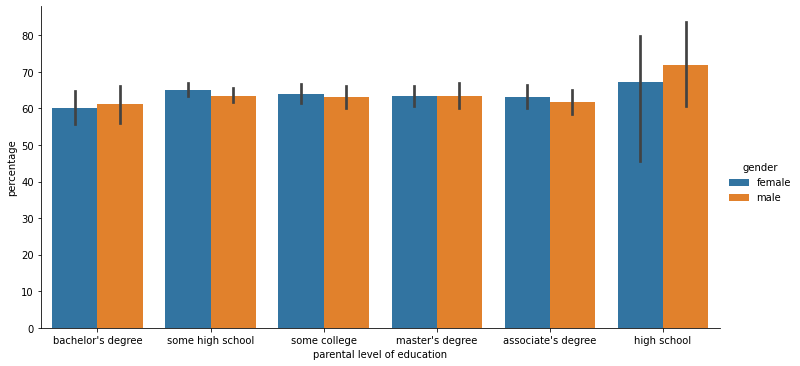

In [89]:
sns.catplot(x='parental level of education', y='percentage', hue='gender', data=data, kind='bar', aspect=2)

## Grouped Bar chart depicting parental level of education

In [90]:
#simple random sample of 100 students 
sample_a=data.sample(n=100)
sample_a

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grades
731,female,group A,some high school,standard,none,70.0,73.0,57.0,45.333333,D
626,male,group D,associate's degree,standard,completed,84.0,97.0,77.0,64.666667,C
602,female,group D,some high school,standard,none,91.0,20.0,94.0,47.000000,D
488,male,group D,master's degree,free/reduced,completed,79.0,97.0,71.0,61.000000,C
803,female,group A,some college,free/reduced,completed,97.0,112.0,101.0,82.000000,A
...,...,...,...,...,...,...,...,...,...,...
204,male,group B,associate's degree,standard,none,74.0,68.0,56.0,44.666667,D
373,female,group D,master's degree,standard,completed,97.0,117.0,110.0,86.666667,A
986,female,group A,some college,standard,none,48.0,86.0,65.0,45.000000,D
6,female,group A,some high school,free/reduced,none,103.0,115.0,106.0,86.666667,A


<AxesSubplot:ylabel='None'>

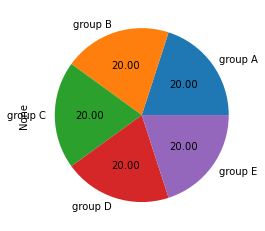

In [91]:
#stratified random sample of 100 students using race as strata
sample_b=data.groupby('race', group_keys=False).apply(lambda x: x.sample(20))

sample_b.groupby('race').size().plot(kind='pie',autopct='%.2f')

## pie plot to verify stratified sampling

In [44]:
#Finding mean of samples
mean_a=sample_a['math score'].mean()
mean_b=sample_b['math score'].mean()
print("Mean of Math score in Simple Random Sampling is:",mean_a)
print("Mean of Math score in Stratified Random Sampling is:",mean_b)

Mean of Math score in Simple Random Sampling is: 80.08
Mean of Math score in Stratified Random Sampling is: 81.84


In [45]:
#Finding error in sample using formula |sample mean-population mean|
mean_p=data['math score'].mean()
print("Sampling Error in Simple Random Sampling ",abs(mean_p-mean_a))
print("Sampling Error in Stratified Random Sampling ",abs(mean_p-mean_b))

Sampling Error in Simple Random Sampling  0.1162851405622547
Sampling Error in Stratified Random Sampling  1.6437148594377504


## Sampling error is less in 'simple random sampling'

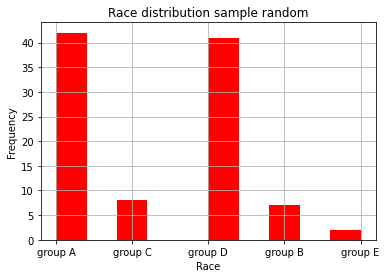

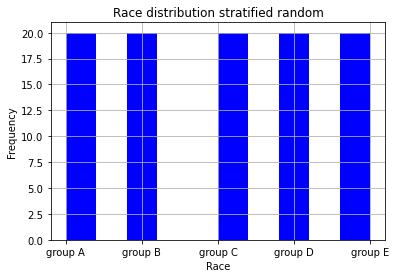

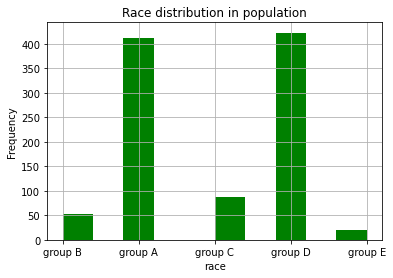

In [46]:
#PLotting the distribution of races in both samples and the population
sample_a['race'].hist(histtype='stepfilled', color='red')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.title('Race distribution sample random')
plt.show()

sample_b['race'].hist(histtype='stepfilled', color='blue')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.title('Race distribution stratified random')
plt.show()

data['race'].hist(histtype='stepfilled', color='green')
plt.xlabel('race')
plt.ylabel('Frequency')
plt.title('Race distribution in population')
plt.show()

## The random sample follows the distribution of race in population and hence is a good representation of the population
## Stratified Random Sampling: All Groups of races have equal representation and hence cannot infer data about the races of students

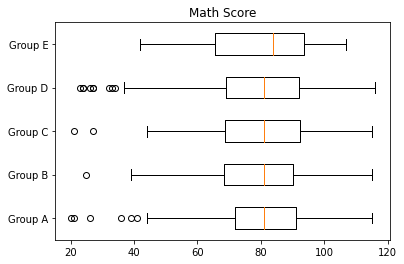

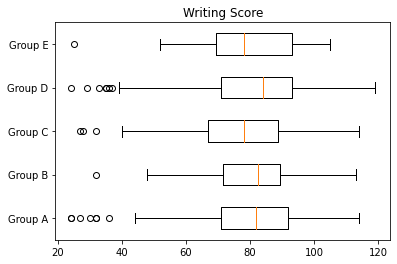

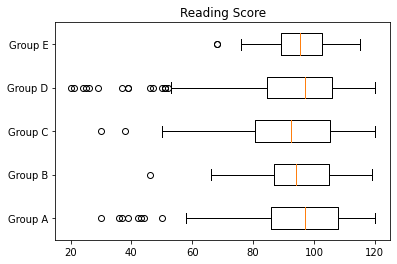

In [95]:
#Boxplot for Score vs Race for each subject

a_m=data[data['race']=='group A']['math score']
b_m=data[data['race']=='group B']['math score']
c_m=data[data['race']=='group C']['math score']
d_m=data[data['race']=='group D']['math score']
e_m=data[data['race']=='group E']['math score']
values=[a_m,b_m,c_m,d_m,e_m]
plt.boxplot(values, vert=False,labels=['Group A','Group B','Group C','Group D','Group E'])
plt.title("Math Score")
plt.show()

a_w=data[data['race']=='group A']['writing score']
b_w=data[data['race']=='group B']['writing score']
c_w=data[data['race']=='group C']['writing score']
d_w=data[data['race']=='group D']['writing score']
e_w=data[data['race']=='group E']['writing score']
values1=[a_w,b_w,c_w,d_w,e_w]
plt.boxplot(values1, vert=False,labels=['Group A','Group B','Group C','Group D','Group E'])
plt.title("Writing Score")
plt.show()

a_r=data[data['race']=='group A']['reading score']
b_r=data[data['race']=='group B']['reading score']
c_r=data[data['race']=='group C']['reading score']
d_r=data[data['race']=='group D']['reading score']
e_r=data[data['race']=='group E']['reading score']
values=[a_r,b_r,c_r,d_r,e_r]
plt.boxplot(values, vert=False,labels=['Group A','Group B','Group C','Group D','Group E'])
plt.title("Reading Score")
plt.show()

# Math Score:
## Group D has highest number of outliers on the lower end of the distribution

# Writing Score:
## Group D has highest number of outliers on the lower end of the distribution

# Reading Score:
## Group D has highest number of outliers on the lower end of the distribution